<br><br>
# <center>ADVANCED DATA ANALYSIS</center>
# <center>HW7</center>
<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br><br><br>
<center>Fan Yang</center>
<center>UNI: fy2232</center>
<center>04/19/2018</center>

<br><br><br>

<br><br><br>

<!---
your comment goes here
and here
-->

***

# Problem 1

***(20pt) The data below show survival times in months of patients with Hodgkin’s disease who were treated with nitrogen mustard. Group A patients received little or no prior therapy whereas Group B patients received heavy prior therapy. Starred are observations are censoring times.***<br>
Group A : $1.25, 1.41, 4.98, 5.25, 5.38, 6.92, 8.89, 10.98, 11.18, 13.11, 13.21, 16.33, 19.77, 21.08, 21.84^+, 22.07, 31.38^+, 32.61^+, 37.18^+, 42.92$<br>
Group B : $1.05, 2.92, 3.61, 4.20, 4.49, 6.72, 7.31, 9.08, 9.11, 14.49^+, 16.85, 18.82^+, 26.59^+, 30.26^+, 41.34^+$

load data first.

In [1]:
library(survival)
timeA <- c(1.25, 1.41, 4.98, 5.25, 5.38,
           6.92, 8.89, 10.98, 11.18, 13.11,
           13.21, 16.33, 19.77, 21.08, 21.84,
           22.07, 31.38, 32.61, 37.18, 42.92)
deltaA <- c(1,1,1,1,1,
            1,1,1,1,1,
            1,1,1,1,0,
            1,0,0,0,1)
timeB <- c(1.05, 2.92, 3.61, 4.20, 4.49,
           6.72, 7.31, 9.08, 9.11, 14.49,
           16.85, 18.82, 26.59, 30.26, 41.34)
deltaB <- c(1,1,1,1,1,
            1,1,1,1,0,
            1,0,0,0,0)

## (a)
***(a) (5pt) Obtain and plot the Kaplan Meier estimates of $S_A$ and $S_B$ , the survival functions of Group A and Group B, respectively.***

In [2]:
kmA <- survfit(Surv(timeA, deltaA)~1,type="kaplan-meier")
kmA$surv

[1] 0.95 0.90 0.85 0.80 0.75 0.70 0.65 0.60 0.55 0.50 0.45 0.40 0.35 0.30 0.30
[16] 0.24 0.24 0.24 0.24 0.00

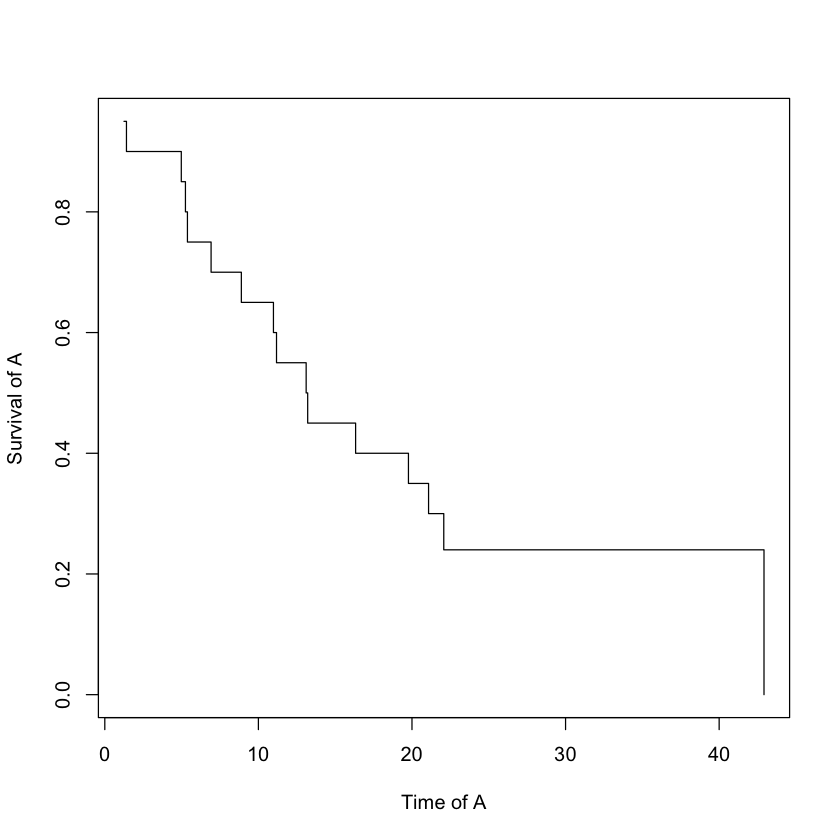

In [3]:
plot(kmA$time,kmA$surv, type="s",xlab="Time of A",ylab="Survival of A")

In [4]:
kmB <- survfit(Surv(timeB, deltaB)~1,type="kaplan-meier")
kmB$surv

[1] 0.9333333 0.8666667 0.8000000 0.7333333 0.6666667 0.6000000 0.5333333
 [8] 0.4666667 0.4000000 0.4000000 0.3200000 0.3200000 0.3200000 0.3200000
[15] 0.3200000

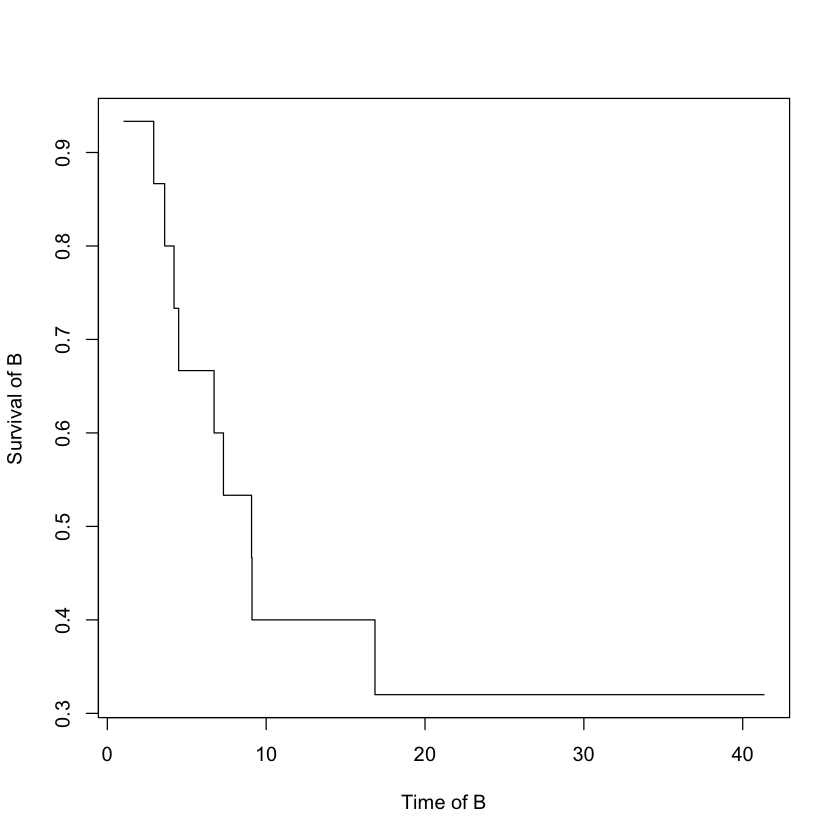

In [5]:
plot(kmB$time,kmB$surv, type="s",xlab="Time of B",ylab="Survival of B")

## (b)
***(b) (2.5pt) Estimate $S_A(10)$ and $S_B(10)$ using a 95% confidence interval.***

In [6]:
summary(kmA)

Call: survfit(formula = Surv(timeA, deltaA) ~ 1, type = "kaplan-meier")

  time n.risk n.event survival std.err lower 95% CI upper 95% CI
  1.25     20       1     0.95  0.0487        0.859        1.000
  1.41     19       1     0.90  0.0671        0.778        1.000
  4.98     18       1     0.85  0.0798        0.707        1.000
  5.25     17       1     0.80  0.0894        0.643        0.996
  5.38     16       1     0.75  0.0968        0.582        0.966
  6.92     15       1     0.70  0.1025        0.525        0.933
  8.89     14       1     0.65  0.1067        0.471        0.897
 10.98     13       1     0.60  0.1095        0.420        0.858
 11.18     12       1     0.55  0.1112        0.370        0.818
 13.11     11       1     0.50  0.1118        0.323        0.775
 13.21     10       1     0.45  0.1112        0.277        0.731
 16.33      9       1     0.40  0.1095        0.234        0.684
 19.77      8       1     0.35  0.1067        0.193        0.636
 21.08      7    

From the above result, we can get the $95\%$ confidence interval for $S_A(10)$ to be [0.471,0.897]

In [7]:
summary(kmB)

Call: survfit(formula = Surv(timeB, deltaB) ~ 1, type = "kaplan-meier")

  time n.risk n.event survival std.err lower 95% CI upper 95% CI
  1.05     15       1    0.933  0.0644        0.815        1.000
  2.92     14       1    0.867  0.0878        0.711        1.000
  3.61     13       1    0.800  0.1033        0.621        1.000
  4.20     12       1    0.733  0.1142        0.540        0.995
  4.49     11       1    0.667  0.1217        0.466        0.953
  6.72     10       1    0.600  0.1265        0.397        0.907
  7.31      9       1    0.533  0.1288        0.332        0.856
  9.08      8       1    0.467  0.1288        0.272        0.802
  9.11      7       1    0.400  0.1265        0.215        0.743
 16.85      5       1    0.320  0.1239        0.150        0.684

From the above result, we can get the $95\%$ confidence interval for $S_B(10)$ to be [0.215,0.743]

## (c)
***(5pt)Test $H_0 :S_A =S_B $ against $H_a :S_A\not=S_B$, Use $\alpha=0.05$.***

reshape data:

In [8]:
data <- data.frame(time = c(timeA,timeB),
                   delta = c(deltaA,deltaB),
                   group = c(rep(1,length(timeA)), rep(2,length(timeB))))
head(data)
survdiff(Surv(time,delta)~group,rho=0 , data = data )

time,delta,group
1.25,1,1
1.41,1,1
4.98,1,1
5.25,1,1
5.38,1,1
6.92,1,1


Call:
survdiff(formula = Surv(time, delta) ~ group, data = data, rho = 0)

         N Observed Expected (O-E)^2/E (O-E)^2/V
group=1 20       16    16.66    0.0261    0.0749
group=2 15       10     9.34    0.0466    0.0749

 Chisq= 0.1  on 1 degrees of freedom, p= 0.784 

In the test $H_0 :S_A =S_B $ against $H_a :S_A\not=S_B$ under $\alpha=0.05$, we got the p-value equals to 0.784.<br> Therefore we fail to reject the null hypothesis that the two survival functions are equal.

## (d)
***(5pt) Assume that it appropriate to use Cox proportional hazard model to these data. That is assume that
$$\lambda(t|x) = \lambda_0(t)e^{\beta x}$$
where x = 0 if group A and x = 1 if group 1. Estimate the hazard ratio using a 95%
confidence interval. Interpret your result.***

In [9]:
fitphm <- coxph(Surv(time,delta)~factor(group), data = data)
fitphm
confint(fitphm)
exp(confint(fitphm))

Call:
coxph(formula = Surv(time, delta) ~ factor(group), data = data)

                coef exp(coef) se(coef)    z    p
factor(group)2 0.112     1.119    0.410 0.27 0.78

Likelihood ratio test=0.07  on 1 df, p=0.785
n= 35, number of events= 26 

,2.5 %,97.5 %
factor(group)2,-0.6907948,0.9148215


,2.5 %,97.5 %
factor(group)2,0.5011776,2.49633


From this output, we found that the estimated coefficient or $\beta$ is **0.112**, with a confidence interval **[-0.6907948, 0.9148215]**<br><br>
While the hazard ratio comparing x=1 to x=0 is defined as $e^{\beta}$. Therefore the confidence interval is **[0.5011776, 2.49633]**<br><br>
The hazard ratio tells us how much more likely one individual is to die than another at any particular point in time.

## (e)
***(2.5pt)Test $H_0 : \beta=0$ against $H_a :\beta \not= 0 $ using $\alpha=0.05$.***

In [10]:
summary(fitphm)

Call:
coxph(formula = Surv(time, delta) ~ factor(group), data = data)

  n= 35, number of events= 26 

                 coef exp(coef) se(coef)     z Pr(>|z|)
factor(group)2 0.1120    1.1185   0.4096 0.273    0.784

               exp(coef) exp(-coef) lower .95 upper .95
factor(group)2     1.119      0.894    0.5012     2.496

Concordance= 0.539  (se = 0.054 )
Rsquare= 0.002   (max possible= 0.987 )
Likelihood ratio test= 0.07  on 1 df,   p=0.7853
Wald test            = 0.07  on 1 df,   p=0.7845
Score (logrank) test = 0.07  on 1 df,   p=0.7844


In our test $H_0 : \beta=0$ against $H_a :\beta \not= 0 $ under $\alpha=0.05$. We found that the $Z$ statistic is 0.271 with p-value 0.784.<br>
Therefore we fail to reject the null hypothesis and conclude that $\beta=0$.